### Dependent variable:

FG%

### Independent variables:

Your team:

- **Home/away game**
- FGM
- FGA
- FT%
- PTS *(might be data leakage)*
- 3PT % *(might be data leakage)*
- Assists

Opposing team:
- FGM/FGA
- PTS


## Other variables:

- Minutes Played (Reg, OT, 2OT, 3OT)
- **Unemployment rate in Boston (or US)**


### Be mindful of:

Styles of basketball change over time - whatever dependent variable I have should be minimally confounded by these other variables like changing game style (pushing towards the 3 pt line, or towards faster pace, for example)

## Sources:

https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&match=game&lg_id=NBA&is_playoffs=N&team_seed_cmp=eq&opp_seed_cmp=eq&year_min=1984&year_max=2019&is_range=N&game_num_type=team&team_id=BOS&order_by=date_game
- Bulk of scoring data

https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&match=game&lg_id=NBA&is_playoffs=N&team_seed_cmp=eq&opp_seed_cmp=eq&year_min=1984&year_max=2019&is_range=N&game_num_type=team&team_id=BOS&order_by=drb
- Rebounds (your team and opposing)

https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&match=game&lg_id=NBA&is_playoffs=N&team_seed_cmp=eq&opp_seed_cmp=eq&year_min=1984&year_max=2019&is_range=N&game_num_type=team&team_id=BOS&order_by=ast
- AST, STL, BLK, TO, Fouls

# Lessons Learned in Project 2

1. Do as much work in bundles as you can, in order to save time by defining functions (3 dfs of the same web scraping, even though I didn't know I'd be using read_html at the time)
2. Ensure that your data is totally clean and processed correctly before:

    A) moving on to other things

    B) dropping columns    

I deleted the "useless" index column before realizing that my dataset was the same 100 data points replicated 29 times, rather than 29 separate pages of data, totalling 2,900 data points. This would have been disastrous, and it was because I didn't double-check one method of how I filtered the data. I replicated the same data without noticing. I only noticed because a new dataframe still had the index columns and I looked a little bit deeper into that one

3. Ensure that when you make a solution in a new row, that you run that cell. Your error may go unnoticed until many cells later, when a new error pops up (Ex: Not running the cells that properly fixed the 29 duplicate 100 row tables, in order to get 2900 separate values)

In [174]:
import requests
import pandas as pd
import numpy as np
import time
import random
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import sklearn


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, RidgeCV, ElasticNet
from sklearn.model_selection import GridSearchCV
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from datetime import datetime
from bs4 import BeautifulSoup

pd.options.display.max_rows = 20
pd.options.display.max_columns = 15

Scrape until offset=2800 at the end of the URL

In [4]:
# NOTE: WEB SCRAPING
# Scrape every page for our main dataset - each table is an element in list_of_dfs
list_of_dfs = []
for i in range(29):
    list_of_dfs.append(pd.read_html(f'https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&player=&match=game&lg_id=NBA&year_min=1984&year_max=2019&team_id=BOS&opp_id=&is_range=N&is_playoffs=N&round_id=&best_of=&team_seed=&opp_seed=&team_seed_cmp=eq&opp_seed_cmp=eq&game_num_type=team&game_num_min=&game_num_max=&game_month=&game_location=&game_result=&is_overtime=&c1stat=&c1comp=&c1val=&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&order_by=date_game&order_by_asc=&offset={i}00'))
    time.sleep(1.5+1.14*random.random())
    
    

In [5]:
#len(list_of_dfs) # Success! We have 29 elements in our list
list_of_dfs[2][0] # Gut-check of a random df in our list looks good

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk               Date                 Tm   
0                  201         2017-01-27                BOS   
1                  202         2017-01-25                BOS   
2                  203         2017-01-24                BOS   
3                  204         2017-01-21                BOS   
4                  205         2017-01-18                BOS   
5                  206         2017-01-16                BOS   
6                  207         2017-01-13                BOS   
7                  208         2017-01-11                BOS   
8                  209         2017-01-10                BOS   
9                  210         2017-01-07                BOS   
..                 ...                ...                ...   
94                 291         2016-01-12                BOS   
95                 292         2016-01-10                BOS   
96                 293         2016-01-07                BOS   
97                 294         2016-01-06                BOS   
98                 295         2016-01-04                BOS   
99                 296         2016-01-02                BOS   
100                297         2015-12-30                BOS   
101                298         2015-12-27                BOS   
102                299         2015-12-26                BOS   
103                300         2015-12-23                BOS   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
    Unnamed: 3_level_1                Opp             Result   
0                  NaN                ORL           W 128-98   
1                  NaN                HOU          W 120-109   
2                    @                WAS          L 108-123   
3                  NaN                POR     L 123-127 (OT)   
4                  NaN                NYK          L 106-117   
5                  NaN                CHO           W 108-98   
6                    @                ATL          W 103-101   
7                  NaN                WAS          W 117-108   
8                    @                TOR          L 106-114   
9                  NaN                NOP          W 117-108   
..                 ...                ...                ...   
94                   @                NYK          L 114-120   
95                   @                MEM           L 98-101   
96                   @                CHI           L 92-101   
97                 NaN                DET            L 94-99   
98                   @                BRK           W 103-94   
99                 NaN                BRK           L 97-100   
100                NaN                LAL          L 104-112   
101                NaN                NYK           W 100-91   
102                  @                DET            W 99-93   
103                  @                CHO           W 102-89   

    Unnamed: 6_level_0  ... Opponent                               
                    MP  ...       3P 3PA   3P%  FT FTA   FT%  PTS  
0                  240  ...        9  25  .360  13  18  .722   98  
1                  240  ...       10  31  .323  27  38  .711  109  
2                  240  ...        9  20  .450  18  21  .857  123  
3                  265  ...       10  25  .400  31  36  .861  127  
4                  240  ...       10  25  .400  15  18  .833  117  
5                  240  ...        8  25  .320  14  17  .824   98  
6                  240  ...       11  30  .367  18  21  .857  101  
7                  240  ...       10  26  .385   8  12  .667  108  
8                  240  ...       10  22  .455  22  27  .815  114  
9                  240  ...       10  31  .323  18  23  .783  108  
..                 ...  ...      ...  ..   ...  ..  ..   ...  ...  
94                 240  ...        7  20  .350  27  30  .900  120  
95                 240  ...        4  16  .250  35  40  .875  101  
96                 240  ...        9  

## Other datasets:

Now I need to clean and add other datasets to expand my data set - rebounds and assists

In [6]:
# NOTE: WEB SCRAPING
# Scrape for rebound statistics
reb_list = []
for i in range(29):
    reb_list.append(pd.read_html(f'https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&player=&match=game&lg_id=NBA&year_min=1984&year_max=2019&team_id=BOS&opp_id=&is_range=N&is_playoffs=N&round_id=&best_of=&team_seed=&opp_seed=&team_seed_cmp=eq&opp_seed_cmp=eq&game_num_type=team&game_num_min=&game_num_max=&game_month=&game_location=&game_result=&is_overtime=&c1stat=&c1comp=&c1val=&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&order_by=drb&order_by_asc=&offset={i}00'))
    time.sleep(1.5+1.14*random.random())
    
    

In [7]:
reb_list[12][0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk               Date                 Tm   
0                 1201         2002-01-02                BOS   
1                 1202         2002-02-01                BOS   
2                 1203         2002-02-16                BOS   
3                 1204         2002-03-08                BOS   
4                 1205         2002-03-13                BOS   
5                 1206         2002-03-27                BOS   
6                 1207         2003-01-06                BOS   
7                 1208         2003-01-12                BOS   
8                 1209         2003-03-05                BOS   
9                 1210         2003-12-01                BOS   
..                 ...                ...                ...   
94                1291         2016-03-31                BOS   
95                1292         2016-11-12                BOS   
96                1293         2016-12-05                BOS   
97                1294         2017-01-07                BOS   
98                1295         2017-02-08                BOS   
99                1296         2017-03-15                BOS   
100               1297         2017-10-18                BOS   
101               1298         2017-11-08                BOS   
102               1299         2017-11-18                BOS   
103               1300         2017-12-18                BOS   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
    Unnamed: 3_level_1                Opp             Result   
0                  NaN                ORL           W 110-94   
1                  NaN                MIN       L 95-98 (OT)   
2                    @                SEA            L 79-99   
3                  NaN                DET           W 117-92   
4                  NaN                NJN            W 97-89   
5                  NaN                GSW           W 102-99   
6                  NaN                WAS           L 95-100   
7                    @                SAS            L 80-81   
8                  NaN                NYK            W 97-95   
9                  NaN                MEM            L 89-96   
..                 ...                ...                ...   
94                   @                POR          L 109-116   
95                   @                IND           W 105-99   
96                   @                HOU          L 106-107   
97                 NaN                NOP          W 117-108   
98                   @                SAC           L 92-108   
99                 NaN                MIN          W 117-104   
100                NaN                MIL          L 100-108   
101                NaN                LAL           W 107-96   
102                  @                ATL           W 110-99   
103                  @                IND          W 112-111   

    Unnamed: 6_level_0 Team         Opponent          
                    MP  ORB DRB TRB      ORB DRB TRB  
0                  240   11  32  43       10  25  35  
1                  265    9  32  41       11  44  55  
2                  240    9  32  41       13  34  47  
3                  240   10  32  42       12  25  37  
4                  240   10  32  42        7  34  41  
5                  240    9  32  41       18  38  56  
6                  240   10  32  42        6  31  37  
7                  240    9  32  41       12  26  38  
8                  240    5  32  37        8  30  38  
9                  240    9  32  41       14  33  47  
..                 ...  ...  ..  ..      ...  ..  ..  
94                 240   16  32  48       15  35  50  
95                 240   15  32  47       11  29  40  
96                 240   10  32  42        7  39  46  
97                 240   15  32  47        9  33  42  
98                 240    7  32  39        4  36  40  
99                 240    5  32  37       15  27  42  
100          

In [8]:
# NOTE: WEB SCRAPING
# Scrape for periphery stats - assists, steals, blocks, turnovers, personal fouls

xstats_list = []
for i in range(29):
    xstats_list.append(pd.read_html(f'https://www.basketball-reference.com/play-index/tgl_finder.cgi?request=1&player=&match=game&lg_id=NBA&year_min=1984&year_max=2019&team_id=BOS&opp_id=&is_range=N&is_playoffs=N&round_id=&best_of=&team_seed=&opp_seed=&team_seed_cmp=eq&opp_seed_cmp=eq&game_num_type=team&game_num_min=&game_num_max=&game_month=&game_location=&game_result=&is_overtime=&c1stat=&c1comp=&c1val=&c2stat=&c2comp=&c2val=&c3stat=&c3comp=&c3val=&c4stat=&c4comp=&c4val=&order_by=ast&order_by_asc=&offset={i}00'))
    time.sleep(1.5+1.14*random.random())
    
    

In [9]:
xstats_list[15][0]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk               Date                 Tm   
0                 1501         1994-01-14                BOS   
1                 1502         1994-02-20                BOS   
2                 1503         1994-03-04                BOS   
3                 1504         1994-03-07                BOS   
4                 1505         1994-03-14                BOS   
5                 1506         1994-04-05                BOS   
6                 1507         1994-12-28                BOS   
7                 1508         1995-02-01                BOS   
8                 1509         1995-04-10                BOS   
9                 1510         1995-12-18                BOS   
..                 ...                ...                ...   
94                1591         2009-03-23                BOS   
95                1592         2009-04-08                BOS   
96                1593         2009-11-04                BOS   
97                1594         2009-11-25                BOS   
98                1595         2010-04-14                BOS   
99                1596         2010-12-01                BOS   
100               1597         2010-12-19                BOS   
101               1598         2011-01-10                BOS   
102               1599         2011-01-19                BOS   
103               1600         2011-02-01                BOS   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
    Unnamed: 3_level_1                Opp             Result   
0                  NaN                LAC           L 95-102   
1                    @                POR           L 93-102   
2                  NaN                LAL           W 109-99   
3                    @                MIA          W 112-104   
4                    @                CHH     L 101-107 (OT)   
5                    @                NJN           L 94-120   
6                  NaN                CHI           L 97-105   
7                  NaN                CHH           L 93-100   
8                    @                CHH           L 95-119   
9                  NaN                CHI          L 114-123   
..                 ...                ...                ...   
94                 NaN                LAC            W 90-77   
95                 NaN                NJN          W 106-104   
96                   @                MIN            W 92-90   
97                 NaN                PHI          W 113-110   
98                 NaN                MIL           L 95-106   
99                 NaN                POR            W 99-95   
100                NaN                IND            W 99-88   
101                NaN                HOU          L 102-108   
102                NaN                DET            W 86-82   
103                  @                SAC            W 95-90   

    Unnamed: 6_level_0  ... Team     Opponent                  
                    MP  ...  TOV  PF      AST STL BLK TOV  PF  
0                  240  ...   25  29       24  14   3  20  22  
1                  240  ...   19  22       25  12   1   9  18  
2                  240  ...    9  17       21   6   1  14  22  
3                  240  ...   13  27       15   3   2  14  24  
4                  265  ...   21  25       30  13   8  18  20  
5                  240  ...   18  18       34  11   6  14  12  
6                  240  ...   14  29       24   5   4  18  23  
7                  240  ...   16  28       20  11   5  16  17  
8                  240  ...   16  20       33  11   5  15  17  
9                  240  ...   18  30       28  10   6  16  29  
..                 ...  ...  ...  ..      ...  ..  ..  ..  ..  
94                 240  ...   14  18       24   8  10  21  18  
95                 240  ...   10  17       24   5   2  10  19  
96                 240  ...    9  13       22   5   2  17  18  
97                 240  ...   12  

**Now that we have all three of our dfs scraped - list_of_dfs as the main df, reb_list and xstats_list, we can start cleaning the data to get them ready to combine**

In [10]:
flat_list_of_dfs = [df[0] for df in list_of_dfs] #Flattening the list of lists of dfs into a list of dfs
len(flat_list_of_dfs)

29

In [11]:
flat_list_of_dfs[5]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk               Date                 Tm   
0                  501         2013-03-31                BOS   
1                  502         2013-03-29                BOS   
2                  503         2013-03-27                BOS   
3                  504         2013-03-26                BOS   
4                  505         2013-03-23                BOS   
5                  506         2013-03-22                BOS   
6                  507         2013-03-20                BOS   
7                  508         2013-03-18                BOS   
8                  509         2013-03-16                BOS   
9                  510         2013-03-13                BOS   
..                 ...                ...                ...   
94                 591         2012-03-26                BOS   
95                 592         2012-03-25                BOS   
96                 593         2012-03-23                BOS   
97                 594         2012-03-22                BOS   
98                 595         2012-03-19                BOS   
99                 596         2012-03-17                BOS   
100                597         2012-03-16                BOS   
101                598         2012-03-14                BOS   
102                599         2012-03-12                BOS   
103                600         2012-03-11                BOS   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
    Unnamed: 3_level_1                Opp             Result   
0                    @                NYK           L 89-108   
1                  NaN                ATL          W 118-107   
2                    @                CLE            W 93-92   
3                  NaN                NYK           L 85-100   
4                    @                MEM          L 106-110   
5                    @                DAL           L 94-104   
6                    @                NOH            L 86-87   
7                  NaN                MIA          L 103-105   
8                  NaN                CHA           W 105-88   
9                  NaN                TOR           W 112-88   
..                 ...                ...                ...   
94                   @                CHA           W 102-95   
95                 NaN                WAS            W 88-76   
96                   @                PHI            L 86-99   
97                   @                MIL           W 100-91   
98                   @                ATL            W 79-76   
99                   @                DEN            L 91-98   
100                  @                SAC           L 95-120   
101                  @                GSW          W 105-103   
102                  @                LAC            W 94-85   
103                  @                LAL            L 94-97   

    Unnamed: 6_level_0  ... Opponent                               
                    MP  ...       3P 3PA   3P%  FT FTA   FT%  PTS  
0                  240  ...       14  27  .519  24  31  .774  108  
1                  240  ...        8  20  .400  19  24  .792  107  
2                  240  ...        7  17  .412   9  14  .643   92  
3                  240  ...        8  28  .286  14  18  .778  100  
4                  240  ...        4  11  .364  20  24  .833  110  
5                  240  ...        6  19  .316  22  28  .786  104  
6                  240  ...        5  16  .313  20  26  .769   87  
7                  240  ...        7  20  .350  14  21  .667  105  
8                  240  ...        7  20  .350  13  21  .619   88  
9                  240  ...        3  13  .231  17  19  .895   88  
..                 ...  ...      ...  ..   ...  ..  ..   ...  ...  
94                 240  ...        4  12  .333  25  35  .714   95  
95                 240  ...        3  14  .214  13  19  .684   76  
96                 240  ...        3  

In [12]:
flat_reb_list = [df[0] for df in reb_list]
flat_xstats_list = [df[0] for df in xstats_list]

In [13]:
flat_xstats_list[5]

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                    Rk               Date                 Tm   
0                  501         1990-02-28                BOS   
1                  502         1990-03-09                BOS   
2                  503         1990-03-11                BOS   
3                  504         1990-03-13                BOS   
4                  505         1990-03-24                BOS   
5                  506         1990-04-17                BOS   
6                  507         1990-04-22                BOS   
7                  508         1990-11-17                BOS   
8                  509         1991-03-04                BOS   
9                  510         1991-11-01                BOS   
..                 ...                ...                ...   
94                 591         1986-02-02                BOS   
95                 592         1986-03-14                BOS   
96                 593         1986-04-06                BOS   
97                 594         1986-11-14                BOS   
98                 595         1986-11-25                BOS   
99                 596         1987-01-07                BOS   
100                597         1987-01-10                BOS   
101                598         1987-01-25                BOS   
102                599         1987-02-19                BOS   
103                600         1987-04-17                BOS   

    Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
    Unnamed: 3_level_1                Opp             Result   
0                  NaN                DAL           W 111-98   
1                  NaN                WSB          L 108-115   
2                  NaN                PHI          W 107-105   
3                    @                ATL          W 112-100   
4                    @                NYK          W 115-110   
5                    @                CHI          L 105-111   
6                    @                PHI           W 118-98   
7                    @                WSB           W 102-90   
8                  NaN                IND          W 126-101   
9                  NaN                CHH          W 111-108   
..                 ...                ...                ...   
94                 NaN                SEA          W 114-101   
95                   @                ATL          W 121-114   
96                   @                PHI            L 94-95   
97                   @                CHI           W 110-98   
98                   @                PHI          L 100-102   
99                 NaN                MIL           W 119-92   
100                  @                DET          L 101-118   
101                NaN                PHI           W 111-96   
102                  @                HOU            W 99-92   
103                NaN                CHI          W 108-105   

    Unnamed: 6_level_0  ... Team     Opponent                  
                    MP  ...  TOV  PF      AST STL BLK TOV  PF  
0                  240  ...   18  15       22  14   1   9  21  
1                  240  ...   13  21       34   9   1  10  25  
2                  240  ...   10  27       24   4   0   9  25  
3                  240  ...   11  15       23   9   4  13  23  
4                  240  ...   14  20       32  11   2  10  26  
5                  240  ...   13  22       25   9   2  11  21  
6                  240  ...   11  23       21   7   6  18  18  
7                  240  ...   19  21       12  10   2  15  18  
8                  240  ...   20  22       25  11   2  16  21  
9                  240  ...   13  29       19   8   5  12  25  
..                 ...  ...  ...  ..      ...  ..  ..  ..  ..  
94                 240  ...   14  25       24   9   0  18  26  
95                 240  ...    9  20       28   7   3  10  28  
96                 240  ...   22  19       22  16   7  15  15  
97                 240  ...   19  

In [14]:
df = pd.concat(flat_list_of_dfs, ignore_index=True)
df

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk               Date                 Tm   
0                   001         2019-04-09                BOS   
1                   002         2019-04-07                BOS   
2                     3         2019-04-05                BOS   
3                     4         2019-04-03                BOS   
4                     5         2019-04-01                BOS   
5                     6         2019-03-30                BOS   
6                     7         2019-03-29                BOS   
7                     8         2019-03-26                BOS   
8                     9         2019-03-24                BOS   
9                    10         2019-03-23                BOS   
...                 ...                ...                ...   
3006               2891         1983-11-19                BOS   
3007               2892         1983-11-18                BOS   
3008               2893         1983-11-16                BOS   
3009               2894         1983-11-15                BOS   
3010               2895         1983-11-12                BOS   
3011               2896         1983-11-11                BOS   
3012               2897         1983-11-09                BOS   
3013               2898         1983-11-08                BOS   
3014               2899         1983-11-05                BOS   
3015               2900         1983-11-04                BOS   

     Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
     Unnamed: 3_level_1                Opp             Result   
0                     @                WAS          W 116-110   
1                   NaN                ORL          L 108-116   
2                     @                IND           W 117-97   
3                     @                MIA          W 112-102   
4                   NaN                MIA          W 110-105   
5                     @                BRK           L 96-110   
6                   NaN                IND          W 114-112   
7                     @                CLE          W 116-106   
8                   NaN                SAS           L 96-115   
9                     @                CHO          L 117-124   
...                 ...                ...                ...   
3006                  @                PHI            L 91-92   
3007                NaN                NYK          L 103-110   
3008                  @                UTA          L 109-122   
3009                  @                DEN          W 140-124   
3010                  @                CHI          W 116-101   
3011                NaN                DET          W 126-118   
3012                NaN                SDC          W 129-122   
3013                  @                IND            W 99-97   
3014                  @                WSB          W 120-117   
3015                NaN                IND          W 121-105   

     Unnamed: 6_level_0  ... Opponent                                
                     MP  ...       3P 3PA   3P%  FT FTA    FT%  PTS  
0                   240  ...       14  39  .359  14  18   .778  110  
1                   240  ...       12  33  .364  22  22  1.000  116  
2                   240  ...       10  23  .435  11  19   .579   97  
3                   240  ...       12  36  .333  12  20   .600  102  
4                   240  ...       10  37  .270  15  18   .833  105  
5                   240  ...       12  38  .316  22  28   .786  110  
6                   240  ...       12  27  .444  16  23   .696  112  
7                   240  ...        9  28  .321  19  25   .760  106  
8                   240  ...        8  24  .333   7   8   .875  115  
9                   240  ...       18  38  .474  22  28   .786  124  
...                 ...  ...      ...  ..   ...  ..  ..    ...  ...  
3006                240  ...        0   0   NaN  12  19   .632   92  
3007                240  ...     

In [15]:
reb_df = pd.concat(flat_reb_list, ignore_index = True)
xstats_df = pd.concat(flat_xstats_list, ignore_index = True)
xstats_df.tail()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
                     Rk               Date                 Tm   
3011               2896         2009-03-08                BOS   
3012               2897         2018-04-04                BOS   
3013               2898         1996-02-13                BOS   
3014               2899         1998-01-13                BOS   
3015               2900         2007-01-07                BOS   

     Unnamed: 3_level_0 Unnamed: 4_level_0 Unnamed: 5_level_0  \
     Unnamed: 3_level_1                Opp             Result   
3011                NaN                ORL            L 79-86   
3012                  @                TOR            L 78-96   
3013                  @                LAC           W 108-94   
3014                NaN                SAS            L 88-97   
3015                  @                ORL            L 79-87   

     Unnamed: 6_level_0  ... Team     Opponent                  
                     MP  ...  TOV  PF      AST STL BLK TOV  PF  
3011                240  ...   17  23       17   9   9  13  23  
3012                240  ...   16  16       23  10   6  10  25  
3013                240  ...    9  16       15   4  10  19  27  
3014                240  ...   13  24       24   8   6  22  21  
3015                240  ...   17  31       15   9   7  21  26  

[5 rows x 17 columns]

In [16]:
df.columns

MultiIndex(levels=[['Opponent', 'Team', 'Unnamed: 0_level_0', 'Unnamed: 1_level_0', 'Unnamed: 2_level_0', 'Unnamed: 3_level_0', 'Unnamed: 4_level_0', 'Unnamed: 5_level_0', 'Unnamed: 6_level_0'], ['2P', '2P%', '2PA', '3P', '3P%', '3PA', 'Date', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'MP', 'Opp', 'PTS', 'Result', 'Rk', 'Tm', 'Unnamed: 3_level_1']],
           codes=[[2, 3, 4, 5, 6, 7, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [17, 6, 18, 19, 14, 16, 13, 7, 9, 8, 0, 2, 1, 3, 5, 4, 10, 12, 11, 15, 7, 9, 8, 0, 2, 1, 3, 5, 4, 10, 12, 11, 15]])

In [17]:
df.shape, reb_df.shape, xstats_df.shape #All data has the same number of rows - good!

((3016, 33), (3016, 13), (3016, 17))

In [18]:
pd.options.display.max_columns = 40
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 Tm Unnamed: 3_level_1   
0                001         2019-04-09                BOS                  @   
1                002         2019-04-07                BOS                NaN   
2                  3         2019-04-05                BOS                  @   
3                  4         2019-04-03                BOS                  @   
4                  5         2019-04-01                BOS                NaN   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Team                \
                 Opp             Result                 MP   FG FGA   FG%  2P   
0                WAS          W 116-110                240   45  99  .455  30   
1                ORL          L 108-116                240   42  89  .472  30   
2                IND           W 117-97                240   48  92  .522  41   
3                MIA          W 112-102                240   38  80  .475  29   
4                MIA          W 110-105                240   36  91  .396  19   

                                             Opponent                          \
  2PA   2P%  3P 3PA   3P%  FT FTA   FT%  PTS       FG FGA   FG%  2P 2PA   2P%   
0  55  .545  15  44  .341  11  23  .478  116       41  97  .423  27  58  .466   
1  58  .517  12  31  .387  12  14  .857  108       41  90  .456  29  57  .509   
2  65  .631   7  27  .259  14  16  .875  117       38  92  .413  28  69  .406   
3  56  .518   9  24  .375  27  31  .871  112       39  95  .411  27  59  .458   
4  51  .373  17  40  .425  21  24  .875  110       40  88  .455  30  51  .588   

                                     
   3P 3PA   3P%  FT FTA    FT%  PTS  
0  14  39  .359  14  18   .778  110  
1  12  33  .364  22  22  1.000  116  
2  10  23  .435  11  19   .579   97  
3  12  36  .333  12  20   .600  102  
4  10  37  .270  15  18   .833  105

## Cleaning column names

In [19]:
# Fixing the column names by collapsing them into one level - rather than MultiIndex
# Only run this cell once, because the first cols argument will not work once the df is changed

# Cleaning the normal df
cols = list(df.columns.get_level_values(1))
cols[3] = 'home' # Clean this name from its messy old name
cols = [x.lower() for x in cols]
cols[7:20] = ['tm_' + x for x in cols[7:20]] # Changing the column names to prepend "tm_"
cols[20:] = ['opp_' + x for x in cols[20:]] # Prepending "opp_" for opponent cols

# Now actually combining them into a fixed column
df.columns = cols

In [20]:
reb_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 Tm Unnamed: 3_level_1   
0                001         1989-04-17                BOS                  @   
1                002         1985-12-25                BOS                  @   
2                  3         1994-04-15                BOS                NaN   
3                  4         1984-01-31                BOS                  @   
4                  5         1986-03-18                BOS                NaN   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Team          \
                 Opp             Result                 MP  ORB DRB TRB   
0                CHH     W 113-108 (OT)                265   21  52  73   
1                NYK    L 104-113 (2OT)                290   12  51  63   
2                ORL    W 113-110 (2OT)                290   14  49  63   
3                CHI           W 106-83                240   16  48  64   
4                CLE           W 126-96                240    9  48  57   

  Opponent          
       ORB DRB TRB  
0       13  31  44  
1       10  45  55  
2       15  38  53  
3        6  36  42  
4       10  26  36

In [21]:
# Cleaning the rebs df
cols = list(reb_df.columns.get_level_values(1))
cols[3] = 'home' # Clean this name from its messy old name
cols = [x.lower() for x in cols]
cols[7:10] = ['tm_' + x for x in cols[7:10]] # Changing the column names to prepend "tm_"
cols[10:] = ['opp_' + x for x in cols[10:]] # Prepending "opp_" for opponent cols

# Now actually combining them into a fixed column
reb_df.columns = cols

In [22]:
reb_df.head()

,rk,date,tm,home,opp,result,mp,tm_orb,tm_drb,tm_trb,opp_orb,opp_drb,opp_trb
0,001,1989-04-17,BOS,@,CHH,W 113-108 (OT),265,21,52,73,13,31,44
1,002,1985-12-25,BOS,@,NYK,L 104-113 (2OT),290,12,51,63,10,45,55
2,3,1994-04-15,BOS,NaN,ORL,W 113-110 (2OT),290,14,49,63,15,38,53
3,4,1984-01-31,BOS,@,CHI,W 106-83,240,16,48,64,6,36,42
4,5,1986-03-18,BOS,NaN,CLE,W 126-96,240,9,48,57,10,26,36


In [23]:
xstats_df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
                  Rk               Date                 Tm Unnamed: 3_level_1   
0                001         1985-12-18                BOS                NaN   
1                002         1990-02-07                BOS                NaN   
2                  3         1985-03-12                BOS                  @   
3                  4         1987-03-06                BOS                NaN   
4                  5         1987-11-07                BOS                  @   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Unnamed: 6_level_0 Team              \
                 Opp             Result                 MP  AST STL BLK TOV   
0                DAL          W 137-117                240   46   7  10  13   
1                CHH          W 146-125                240   45  10   7  16   
2                ATL          W 126-115                240   44   7   2  17   
3                LAC          W 132-111                240   44  12  11  17   
4                WSB    W 140-139 (2OT)                290   44   7   5  26   

      Opponent                  
   PF      AST STL BLK TOV  PF  
0  21       26   7   7  14  14  
1  22       34  12   3  11  23  
2  21       30  14   6  14  19  
3  18       28  13   6  21  20  
4  31       26  13   2  22  30

In [24]:
# Cleaning the xstats df
cols = list(xstats_df.columns.get_level_values(1))
cols[3] = 'home' # Clean this name from its messy old name
cols = [x.lower() for x in cols]
cols[7:12] = ['tm_' + x for x in cols[7:12]] # Changing the column names to prepend "tm_"
cols[12:] = ['opp_' + x for x in cols[12:]] # Prepending "opp_" for opponent cols

# Now actually combining them into a fixed column
xstats_df.columns = cols

In [25]:
xstats_df.head()

,rk,date,tm,home,opp,result,mp,tm_ast,tm_stl,tm_blk,tm_tov,tm_pf,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,001,1985-12-18,BOS,NaN,DAL,W 137-117,240,46,7,10,13,21,26,7,7,14,14
1,002,1990-02-07,BOS,NaN,CHH,W 146-125,240,45,10,7,16,22,34,12,3,11,23
2,3,1985-03-12,BOS,@,ATL,W 126-115,240,44,7,2,17,21,30,14,6,14,19
3,4,1987-03-06,BOS,NaN,LAC,W 132-111,240,44,12,11,17,18,28,13,6,21,20
4,5,1987-11-07,BOS,@,WSB,W 140-139 (2OT),290,44,7,5,26,31,26,13,2,22,30


In [26]:
reb_df['date'].nunique(), xstats_df['date'].nunique(), df['date'].nunique()

(2901, 2901, 2901)

### Now I need to pickle the data

In [27]:
df.to_pickle('main_df.pkl')
reb_df.to_pickle('reb_df.pkl')
xstats_df.to_pickle('xstats_df.pkl')

Great! Now I have cleaned datasets. Now I need to scrape the US BLS website to scrape unemployment data to see if unemployment correlates with a team's fg%.

**Below I am using Selenium to navigate the US BLS website, and BeautifulSoup to scrape the US unemployment rate for various months**

In [28]:
# Selenium commands to navigate to proper time period
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)
driver.get('https://data.bls.gov/timeseries/LAUMT257165000000003?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true')


click_1990 = driver.find_element_by_xpath('//*[@id="bodytext"]/table[1]/tbody/tr[1]/td[3]/font/select/option[1]')
click_1990.click()

click_go = driver.find_element_by_xpath('//*[@id="bodytext"]/table[1]/tbody/tr[1]/td[6]/input')
click_go.click()

unemp_table = driver.page_source # Bypasses the need for a URL to scrape



In [29]:
soup = BeautifulSoup(unemp_table, 'lxml')
soup

<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Bureau of Labor Statistics Data</title>
<!-- START include/global/head.stm -->
<script async="" id="www-widgetapi-script" src="https://s.ytimg.com/yts/jsbin/www-widgetapi-vflNBM2YL/www-widgetapi.js" type="text/javascript"></script><script src="https://www.youtube.com/iframe_api"></script><script async="" src="https://www.google-analytics.com/analytics.js"></script><script id="_fed_an_ua_tag" language="javascript" src="https://dap.digitalgov.gov/Universal-Federated-Analytics-Min.js?agency=DOL&amp;subagency=BLS&amp;yt=true"></script>
<script src="/javascripts/jquery-min.js" type="text/javascript"></script>
<script src="/javascripts/bls.js" type="text/javascript"></script>
<script>
(function (g) {
var d = document, am = d.createElement('script'), h = d.head || d.getElementsByTagName("head")[0], fsr = 'fsReady',
aex = {
  "src": "//

In [30]:
type(soup)

bs4.BeautifulSoup

**Now I have the html data that I need from the BLS, I'll need to loop through tr to find:**
1. Year (th)[0]
2. Month (th)[1]
3. Unemployment Rate (td)[-1]

In [31]:
# tbody gets to the layer of tables that is the body. I can iterate
# on these layers later

trs = soup.find(class_='regular-data').find('tbody').find_all('tr')
len(trs)
trs[0]

<tr class="odd">
<th id="col0 row1">1990</th><th id="col1 row1">Jan</th><td header="col1 row1">2313654</td><td header="col2 row1">2194540</td><td header="col3 row1">119114</td><td header="col4 row1">5.1</td>
</tr>

In [32]:
trs[0].find('th').text

'1990'

In [33]:
# This function will scrape the Years column
years = [row.find('th').text for row in trs] # List to house all the years

years # Beautiful! We have our years

['1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1990',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1991',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1992',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1993',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1994',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1995',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1996',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1997',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1998',
 '1999',
 '1999',
 '1999',
 

In [34]:
# This function will scrape the 'Period' column (months)
months = [row.find('th').findNextSibling().text for row in trs]
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',


In [35]:
# This function will scrape the 'Unemployment' column
unemployment = [row.find_all('td')[-1].text for row in trs]
unemployment    

['5.1',
 '5.2',
 '5.3',
 '5.2',
 '5.4',
 '5.8',
 '6.0',
 '6.2',
 '6.5',
 '6.1',
 '6.4',
 '6.5',
 '7.6',
 '7.7',
 '7.8',
 '7.4',
 '7.9',
 '8.3',
 '8.2',
 '8.2',
 '8.3',
 '7.7',
 '7.6',
 '7.5',
 '8.4',
 '8.2',
 '8.0',
 '7.7',
 '7.9',
 '8.5',
 '8.3',
 '8.1',
 '8.3',
 '7.5',
 '7.3',
 '7.1',
 '7.7',
 '7.5',
 '7.1',
 '6.5',
 '6.5',
 '6.8',
 '6.5',
 '6.3',
 '6.4',
 '5.9',
 '5.6',
 '5.5',
 '6.4',
 '6.1',
 '5.9',
 '5.4',
 '5.4',
 '5.8',
 '5.8',
 '5.6',
 '5.7',
 '5.2',
 '5.0',
 '4.8',
 '5.6',
 '5.2',
 '5.0',
 '4.8',
 '4.8',
 '5.1',
 '5.1',
 '4.8',
 '4.9',
 '4.3',
 '4.1',
 '4.0',
 '4.8',
 '4.5',
 '4.3',
 '3.9',
 '4.0',
 '4.3',
 '4.3',
 '3.9',
 '4.0',
 '3.5',
 '3.5',
 '3.4',
 '4.2',
 '3.9',
 '3.8',
 '3.4',
 '3.5',
 '3.9',
 '3.8',
 '3.5',
 '3.6',
 '3.0',
 '2.9',
 '2.8',
 '3.5',
 '3.3',
 '3.2',
 '2.7',
 '2.8',
 '3.2',
 '3.1',
 '2.9',
 '3.1',
 '2.7',
 '2.6',
 '2.6',
 '3.3',
 '3.1',
 '3.0',
 '2.8',
 '2.8',
 '3.2',
 '3.2',
 '2.9',
 '3.0',
 '2.6',
 '2.6',
 '2.4',
 '3.3',
 '3.0',
 '2.8',
 '2.3',
 '2.3',


In [36]:
# Combine all my scraped lists into a df to merge to my main list
unemployment_df = pd.DataFrame()

unemployment_df['year'] = years
unemployment_df['month'] = months
unemployment_df['unemployment'] = unemployment

unemployment_df

,year,month,unemployment
0,1990,Jan,5.1
1,1990,Feb,5.2
2,1990,Mar,5.3
3,1990,Apr,5.2
4,1990,May,5.4
5,1990,Jun,5.8
6,1990,Jul,6.0
7,1990,Aug,6.2
8,1990,Sep,6.5
9,1990,Oct,6.1


In [37]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 15

In [38]:
unemployment_df['month_year'] = unemployment_df['month'] + " " + unemployment_df['year']

In [39]:
unemployment_df['month_year'] = pd.to_datetime(unemployment_df['month_year'])

In [40]:
unemployment_df.dtypes

year                    object
month                   object
unemployment            object
month_year      datetime64[ns]
dtype: object

In [41]:
unemployment_df #Success, we have month_year datetimes

,year,month,unemployment,month_year
0,1990,Jan,5.1,1990-01-01
1,1990,Feb,5.2,1990-02-01
2,1990,Mar,5.3,1990-03-01
3,1990,Apr,5.2,1990-04-01
4,1990,May,5.4,1990-05-01
5,1990,Jun,5.8,1990-06-01
6,1990,Jul,6.0,1990-07-01
7,1990,Aug,6.2,1990-08-01
8,1990,Sep,6.5,1990-09-01
9,1990,Oct,6.1,1990-10-01


In [42]:
udf = unemployment_df.iloc[:,2:] # Eliminating the year and month columns - unnecessary

In [43]:
udf.tail()

,unemployment,month_year
345,2.6,2018-10-01
346,2.4,2018-11-01
347,2.4(P),2018-12-01
348,3.2,2019-01-01
349,2.8(P),2019-02-01


In [44]:
# Need to clean the udf dataset by eliminating the "Projected" tags on the BLS unemployment rate
udf['unemployment'].replace('2.4(P)', 2.4, inplace = True)
udf['unemployment'].replace('2.8(P)', 2.8, inplace = True)
udf.tail()

,unemployment,month_year
345,2.6,2018-10-01
346,2.4,2018-11-01
347,2.4,2018-12-01
348,3.2,2019-01-01
349,2.8,2019-02-01


In [45]:
# Convert the unemployment rate from string to a float
udf['unemployment'] = udf['unemployment'].astype(float)
udf.dtypes

unemployment           float64
month_year      datetime64[ns]
dtype: object

### My datasets need to have every 21st row removed, because those are a repeat of the headers

In [46]:
df.iloc[20] # Identifying what the header rows look like

rk             Rk
date         Date
tm             Tm
home          NaN
opp           Opp
result     Result
mp             MP
tm_fg          FG
tm_fga        FGA
tm_fg%        FG%
            ...  
opp_2p         2P
opp_2pa       2PA
opp_2p%       2P%
opp_3p         3P
opp_3pa       3PA
opp_3p%       3P%
opp_ft         FT
opp_fta       FTA
opp_ft%       FT%
opp_pts       PTS
Name: 20, Length: 33, dtype: object

In [47]:
df = df[df['opp_3pa'] != '3PA'] #Filtering out rows by removing headers (containing "3PA")
df.shape

(2900, 33)

In [48]:
reb_df.iloc[20], xstats_df.iloc[20] # Identifying what the header rows look like in the other dfs

(rk             Rk
 date         Date
 tm             Tm
 home          NaN
 opp           Opp
 result     Result
 mp             MP
 tm_orb        ORB
 tm_drb        DRB
 tm_trb        TRB
 opp_orb       ORB
 opp_drb       DRB
 opp_trb       TRB
 Name: 20, dtype: object, rk             Rk
 date         Date
 tm             Tm
 home          NaN
 opp           Opp
 result     Result
 mp             MP
 tm_ast        AST
 tm_stl        STL
 tm_blk        BLK
 tm_tov        TOV
 tm_pf          PF
 opp_ast       AST
 opp_stl       STL
 opp_blk       BLK
 opp_tov       TOV
 opp_pf         PF
 Name: 20, dtype: object)

In [49]:
reb_df = reb_df[reb_df['date'] != 'Date']
xstats_df = xstats_df[xstats_df['date'] != 'Date']

reb_df.shape, xstats_df.shape

((2900, 13), (2900, 17))

**Now the 3 dfs are clean of headers**

## Converting to datetime

In [50]:
df.dtypes

rk         object
date       object
tm         object
home       object
opp        object
result     object
mp         object
tm_fg      object
tm_fga     object
tm_fg%     object
            ...  
opp_2p     object
opp_2pa    object
opp_2p%    object
opp_3p     object
opp_3pa    object
opp_3p%    object
opp_ft     object
opp_fta    object
opp_ft%    object
opp_pts    object
Length: 33, dtype: object

In [51]:
# Now I need to make the same month_year column to join my unemployment data on
df['date'] = pd.to_datetime(df['date'])
df.dtypes

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


rk                 object
date       datetime64[ns]
tm                 object
home               object
opp                object
result             object
mp                 object
tm_fg              object
tm_fga             object
tm_fg%             object
                ...      
opp_2p             object
opp_2pa            object
opp_2p%            object
opp_3p             object
opp_3pa            object
opp_3p%            object
opp_ft             object
opp_fta            object
opp_ft%            object
opp_pts            object
Length: 33, dtype: object

In [52]:
reb_df['date'] = pd.to_datetime(reb_df['date'])
xstats_df['date'] = pd.to_datetime(xstats_df['date'])
xstats_df.dtypes, reb_df.dtypes

(rk                 object
 date       datetime64[ns]
 tm                 object
 home               object
 opp                object
 result             object
 mp                 object
 tm_ast             object
 tm_stl             object
 tm_blk             object
 tm_tov             object
 tm_pf              object
 opp_ast            object
 opp_stl            object
 opp_blk            object
 opp_tov            object
 opp_pf             object
 dtype: object, rk                 object
 date       datetime64[ns]
 tm                 object
 home               object
 opp                object
 result             object
 mp                 object
 tm_orb             object
 tm_drb             object
 tm_trb             object
 opp_orb            object
 opp_drb            object
 opp_trb            object
 dtype: object)

# Merging dataframes

First I need to subset the datasets into columns that I actually want to be joined on my main dataset

In [53]:
reb_df.head()

,rk,date,tm,home,opp,result,mp,tm_orb,tm_drb,tm_trb,opp_orb,opp_drb,opp_trb
0,001,1989-04-17,BOS,@,CHH,W 113-108 (OT),265,21,52,73,13,31,44
1,002,1985-12-25,BOS,@,NYK,L 104-113 (2OT),290,12,51,63,10,45,55
2,3,1994-04-15,BOS,NaN,ORL,W 113-110 (2OT),290,14,49,63,15,38,53
3,4,1984-01-31,BOS,@,CHI,W 106-83,240,16,48,64,6,36,42
4,5,1986-03-18,BOS,NaN,CLE,W 126-96,240,9,48,57,10,26,36


Looks like for everything after the 7th column in both other datasets, I will want to merge on those (while keeping the 'date' column)

In [54]:
reb_df_to_merge = reb_df.iloc[:,7:] # Pull all the columns I want to copy
reb_df_to_merge['date'] = reb_df['date'] # Pull in the date column, which I'll use to join
reb_df_to_merge.head()

,tm_orb,tm_drb,tm_trb,opp_orb,opp_drb,opp_trb,date
0,21,52,73,13,31,44,1989-04-17
1,12,51,63,10,45,55,1985-12-25
2,14,49,63,15,38,53,1994-04-15
3,16,48,64,6,36,42,1984-01-31
4,9,48,57,10,26,36,1986-03-18


In [55]:
xstats_df.head()

,rk,date,tm,home,opp,result,mp,...,tm_tov,tm_pf,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,001,1985-12-18,BOS,NaN,DAL,W 137-117,240,...,13,21,26,7,7,14,14
1,002,1990-02-07,BOS,NaN,CHH,W 146-125,240,...,16,22,34,12,3,11,23
2,3,1985-03-12,BOS,@,ATL,W 126-115,240,...,17,21,30,14,6,14,19
3,4,1987-03-06,BOS,NaN,LAC,W 132-111,240,...,17,18,28,13,6,21,20
4,5,1987-11-07,BOS,@,WSB,W 140-139 (2OT),290,...,26,31,26,13,2,22,30


In [56]:
xstats_df_to_merge = xstats_df.iloc[:,7:] # Pull all the columns I want to copy
xstats_df_to_merge['date'] = xstats_df['date'] # Pull in the date column, which I'll use to join
xstats_df_to_merge.head()

,tm_ast,tm_stl,tm_blk,tm_tov,tm_pf,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,date
0,46,7,10,13,21,26,7,7,14,14,1985-12-18
1,45,10,7,16,22,34,12,3,11,23,1990-02-07
2,44,7,2,17,21,30,14,6,14,19,1985-03-12
3,44,12,11,17,18,28,13,6,21,20,1987-03-06
4,44,7,5,26,31,26,13,2,22,30,1987-11-07


In [57]:
df = df.merge(reb_df_to_merge, on='date').merge(xstats_df_to_merge, on='date')

**After merging twice, we lose 6 games from the inner joins. We are left with 2,894 rows**

In [58]:
df.head()

,rk,date,tm,home,opp,result,mp,...,tm_tov,tm_pf,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf
0,001,2019-04-09,BOS,@,WAS,W 116-110,240,...,5,17,28,2,3,15,18
1,002,2019-04-07,BOS,NaN,ORL,L 108-116,240,...,13,19,29,9,7,14,14
2,3,2019-04-05,BOS,@,IND,W 117-97,240,...,11,15,24,5,3,11,15
3,4,2019-04-03,BOS,@,MIA,W 112-102,240,...,11,21,25,6,5,15,23
4,5,2019-04-01,BOS,NaN,MIA,W 110-105,240,...,12,18,27,9,6,15,17


In [59]:
# This lambda function replaces every day of the month with the first of the month, for the purposes
# of merging unemployment data on the month level
df['month_year'] = df['date'].apply(lambda dt: dt.replace(day=1))
df.sample(5)

,rk,date,tm,home,opp,result,mp,...,tm_pf,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,month_year
1588,1592,2000-01-08,BOS,@,CHI,L 79-96,240,...,28,21,10,7,20,23,2000-01-01
2823,2830,1984-03-30,BOS,NaN,ATL,W 105-96,240,...,22,21,10,2,12,28,1984-03-01
2077,2084,1993-04-25,BOS,@,WSB,W 106-94,240,...,21,25,7,4,15,16,1993-04-01
88,89,2018-03-31,BOS,NaN,TOR,W 110-99,240,...,23,23,1,5,15,26,2018-03-01
54,55,2018-12-14,BOS,NaN,ATL,W 129-108,240,...,21,27,10,5,24,19,2018-12-01


**Now I will merge the unemployment data for the city of Boston to the month_year column. I expect to see the unemployment rate duplicated for multiple games in the same month (Ex: All games in February 2017 will have the same unemployment rate, if it is joined properly on the 'month_year' column**

In [60]:
df.merge(udf, on='month_year')['date'].sort_values()

2356   1990-01-03
2355   1990-01-05
2354   1990-01-06
2353   1990-01-09
2352   1990-01-10
2351   1990-01-12
2350   1990-01-13
2349   1990-01-17
2348   1990-01-19
2347   1990-01-21
          ...    
9      2019-02-03
8      2019-02-05
7      2019-02-07
6      2019-02-09
5      2019-02-12
4      2019-02-13
3      2019-02-21
2      2019-02-23
1      2019-02-26
0      2019-02-27
Name: date, Length: 2357, dtype: datetime64[ns]

If we inner join on the unemployment data, we will lose ~500 rows of data. While my original impulse was to not inner join since we're losing so many rows, all those rows are for the period between 1983-1990. I expect the game of basketball to be sufficiently different enough in this time period to make my analysis of what impacts fg% less significant if I include data that is too old.

As a semi-arbitrary cutoff point, I will exclude data prior to 1990.

In [63]:
df_1983 = df.copy()

In [66]:
df = df.merge(udf, on='month_year') # Inner join on month_year - dropping pre-1990 dates

In [68]:
df.sort_values(by='date', inplace=True)

In [73]:
df = df.reset_index().iloc[:,2:] # Resets the index and drops the "Rk" column, which is useless

In [74]:
df.head()

,date,tm,home,opp,result,mp,tm_fg,...,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,month_year,unemployment
0,1990-01-03,BOS,NaN,WSB,W 120-101,240,48,...,27,6,7,10,24,1990-01-01,5.1
1,1990-01-05,BOS,NaN,LAC,L 105-114,240,45,...,25,11,11,19,20,1990-01-01,5.1
2,1990-01-06,BOS,@,WSB,W 102-88,240,40,...,25,6,2,11,23,1990-01-01,5.1
3,1990-01-09,BOS,@,NJN,L 78-87,240,28,...,8,8,1,8,26,1990-01-01,5.1
4,1990-01-10,BOS,NaN,DET,W 104-97,240,37,...,17,5,8,14,30,1990-01-01,5.1


Need to convert "@" and "NaN" in the Home column to bool values

In [13]:
df['home'].replace('@', True, inplace=True)

In [15]:
df['home'].fillna(False, inplace=True)

In [16]:
df.head()

,date,tm,home,opp,result,mp,tm_fg,...,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,month_year,unemployment
0,1990-01-03,BOS,False,WSB,W 120-101,240,48,...,27,6,7,10,24,1990-01-01,5.1
1,1990-01-05,BOS,False,LAC,L 105-114,240,45,...,25,11,11,19,20,1990-01-01,5.1
2,1990-01-06,BOS,True,WSB,W 102-88,240,40,...,25,6,2,11,23,1990-01-01,5.1
3,1990-01-09,BOS,True,NJN,L 78-87,240,28,...,8,8,1,8,26,1990-01-01,5.1
4,1990-01-10,BOS,False,DET,W 104-97,240,37,...,17,5,8,14,30,1990-01-01,5.1


    Now I will convert values to their proper numeric dtype (either float or int)

In [29]:
list(df.columns[1:])

['tm',
 'home',
 'opp',
 'result',
 'mp',
 'tm_fg',
 'tm_fga',
 'tm_fg%',
 'tm_2p',
 'tm_2pa',
 'tm_2p%',
 'tm_3p',
 'tm_3pa',
 'tm_3p%',
 'tm_ft',
 'tm_fta',
 'tm_ft%',
 'tm_pts',
 'opp_fg',
 'opp_fga',
 'opp_fg%',
 'opp_2p',
 'opp_2pa',
 'opp_2p%',
 'opp_3p',
 'opp_3pa',
 'opp_3p%',
 'opp_ft',
 'opp_fta',
 'opp_ft%',
 'opp_pts',
 'tm_orb',
 'tm_drb',
 'tm_trb',
 'opp_orb',
 'opp_drb',
 'opp_trb',
 'tm_ast',
 'tm_stl',
 'tm_blk',
 'tm_tov',
 'tm_pf',
 'opp_ast',
 'opp_stl',
 'opp_blk',
 'opp_tov',
 'opp_pf',
 'month_year',
 'unemployment']

In [55]:
# Converting columns to numeric, ignoring the first (date), and last two (month_year and unemployment)
# If error is raised (Ex: column contains string), ignore the column and return input
for col in list(df.columns[1:-2]):
    df[col] = pd.to_numeric(df.loc[:,col], errors='ignore')

In [58]:
df.head()

,date,tm,home,opp,result,mp,tm_fg,...,opp_ast,opp_stl,opp_blk,opp_tov,opp_pf,month_year,unemployment
0,1990-01-03,BOS,False,WSB,W 120-101,240,48,...,27,6,7,10,24,1990-01-01,5.1
1,1990-01-05,BOS,False,LAC,L 105-114,240,45,...,25,11,11,19,20,1990-01-01,5.1
2,1990-01-06,BOS,True,WSB,W 102-88,240,40,...,25,6,2,11,23,1990-01-01,5.1
3,1990-01-09,BOS,True,NJN,L 78-87,240,28,...,8,8,1,8,26,1990-01-01,5.1
4,1990-01-10,BOS,False,DET,W 104-97,240,37,...,17,5,8,14,30,1990-01-01,5.1


In [57]:
df.dtypes.value_counts() # Most values turned into ints, and some turned into floats

int64             35
float64            9
object             3
datetime64[ns]     2
bool               1
dtype: int64

**Rename the columns that have a "%" sign in the column header, because it looks like Python is getting mad at me for having those**

In [124]:
# Converting column names away from %

df.rename(index=str, columns = {'tm_fg%': 'tm_fg_per', 'tm_2p%': 'tm_2p_per',
                                'tm_3p%': 'tm_3p_per', 'tm_ft%': 'tm_ft_per',
                                'opp_fg%': 'opp_fg_per', 'opp_2p%': 'opp_2p_per',
                                'opp_3p%': 'opp_3p_per', 'opp_ft%': 'opp_ft_per'},
          inplace = True)

In [23]:
# From this data we see that there are some errors from trying to fit a model, unexpectedly for tm and opp 3p_per
y = df['tm_fg_per']

for i in df.columns:
    try:
        X = df[i]
        fgp_model = sm.OLS(y, X)

        results = fgp_model.fit()

        results.summary()
    except:
        print(i)

date
tm
home
opp
result
tm_3p_per
opp_3p_per
month_year


In [29]:
# Here we can see the 3p values for the rows that have nulls - we can drop these
print(df.loc[df['tm_3p_per'].isnull(),['tm_3p','tm_3pa']].count(), '\n',
      df.loc[df['opp_3p_per'].isnull(),['opp_3p','opp_3pa']].count())

# Only 21 rows - time to drop

tm_3p     16
tm_3pa    16
dtype: int64 
 opp_3p     5
opp_3pa    5
dtype: int64


In [32]:
df.shape # 2357 rows before

(2357, 50)

In [34]:
df.dropna(axis=0, inplace = True) # Dropping all remaining NaN values

In [35]:
df.shape # 2337 rows after

(2337, 50)

Now when we run the code below again to test which columns in our dataset cannot be run in the model (it'll print the exception columns), we see that it's only the columns we expect that remain (the non-numeric types. Either datetime or string, for instance)

In [37]:
y = df['tm_fg_per']

for i in df.columns:
    try:
        X = df[i]
        fgp_model = sm.OLS(y, X)

        results = fgp_model.fit()

        results.summary()
    except:
        print(i)

date
tm
home
opp
result
month_year


# *** Read Pickle here ***

In [104]:
df.to_pickle('final_df.pkl')

In [4]:
df = pd.read_pickle('final_df.pkl')

In [ ]:
df.head()

# Building a Model

In [69]:
df.dtypes

date            datetime64[ns]
tm                      object
home                      bool
opp                     object
result                  object
mp                       int64
tm_fg                    int64
tm_fga                   int64
tm_fg%                 float64
tm_2p                    int64
                     ...      
tm_blk                   int64
tm_tov                   int64
tm_pf                    int64
opp_ast                  int64
opp_stl                  int64
opp_blk                  int64
opp_tov                  int64
opp_pf                   int64
month_year      datetime64[ns]
unemployment           float64
Length: 50, dtype: object

In [47]:
# Building a model with statsmodel - will incorporate everything excep fg% in the X variables

#X = df.drop(columns=['tm_2p','tm_fg','tm_fga','tm_fg_per','date','tm','opp','result','month_year']).astype(float)

X = df['tm_3p']
y = df['tm_fg_per']

fgp_model = sm.OLS(y, X)

results = fgp_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tm_fg_per   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     5671.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:48:50   Log-Likelihood:                -79.218
No. Observations:                2337   AIC:                             160.4
Df Residuals:                    2336   BIC:                             166.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tm_3p          0.0533      0.001     75.303      0.000       0.052       0.055
==============================================================================
Omnibus:                       51.285   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.318
Skew:                          -0.373   Prob(JB):                     1.60e-12
Kurtosis:                       3.013   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Can try utilizing date and the team's age as a variable in the linear regression. Convert toordinal() rather than using the raw datetime. Otherwise, the model will take the difference between 1990 and 2018 as being very small (~1%)

Dependent variable:
FG%

Independent variables:
Your team:

Home/away game
FGM
FGA
FT%
PTS (might be data leakage)
3PT % (might be data leakage)
Assists
Opposing team:

FGM/FGA
PTS
Other variables:
Minutes Played (Reg, OT, 2OT, 3OT)
Unemployment rate in Boston (or US)

In [61]:
# Grab the columns that have numeric values only - not string or datetime
df_nums = df.drop(columns=['date', 'tm', 'opp', 'result', 'month_year'])

# Pickle here

In [125]:
df_nums.to_pickle('df_nums.pkl')

In [ ]:
df_nums = pd.read_pickle('df_nums.pkl')

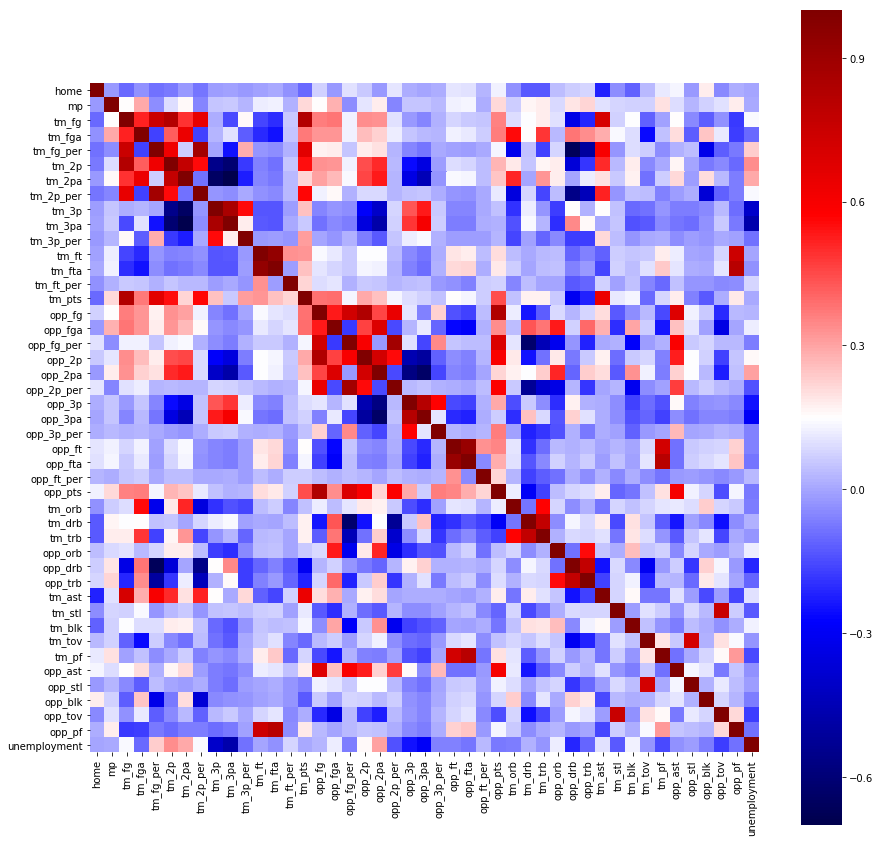

In [156]:
# Making a heatmap to visualize correlations between all valuesb

corrs = df_nums.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrs, square=True, cmap="seismic");

From the above heatmap, we can see that tm_fg_per is not unusually correlated with any other metric. There is a heavy concentration of relationships between tm_fg_per and the other shooting variables (like fg and fga)

**Note: Adding an intercept makes the R-squared and adjusted r-squared much more reasonable, but it's unclear why my normal model without an intercept was having an issue**

In [ ]:
y = df['tm_fg_per']

In [102]:
X = df_nums.drop(columns='tm_fg_per').astype(float) # Taking all numeric columns (no dates or strings), and filtering out tm_fg%

In [106]:
x_const = sm.add_constant(X, prepend = True)
fgp_model = sm.OLS(y, x_const)

results = fgp_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              tm_fg_per   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     9524.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):               0.00
Time:                        18:37:29   Log-Likelihood:                 9114.1
No. Observations:                2337   AIC:                        -1.815e+04
Df Residuals:                    2300   BIC:                        -1.794e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2814      0.010     29.025      0.000       0.262       0.300
home          5.767e-07      0.000      0.003      0.998      -0.000       0.000
mp            4.882e-05   1.55e-05      3.150      0.002    1.84e-05    7.92e-05
tm_fg            0.0019   4.88e-05     38.392      0.000       0.002       0.002
tm_fga          -0.0030   4.02e-05    -74.707      0.000      -0.003      -0.003
tm_2p         5.194e-05   9.35e-05      0.556      0.578      -0.000       0.000
tm_2pa          -0.0004   4.76e-05     -8.179      0.000      -0.000      -0.000
tm_2p_per        0.2910      0.008     34.929      0.000       0.275       0.307
tm_3p            0.0018   6.79e-05     26.816      0.000       0.002       0.002
tm_3pa          -0.0026   3.51e-05    -74.493      0.000      -0.003      -0.003
tm_3p_per        0.0016      0.001      1.329      0.184      -0.001       0.004
tm_ft           -0.0027      0.000    -23.111      0.000      -0.003      -0.002
tm_fta       -7.713e-05      0.000     -0.703      0.482      -0.000       0.000
tm_ft_per       -0.0023      0.003     -0.726      0.468      -0.009       0.004
tm_pts           0.0028   3.18e-05     89.219      0.000       0.003       0.003
opp_fg       -8.697e-05   6.44e-05     -1.350      0.177      -0.000    3.94e-05
opp_fga          0.0002   7.42e-05      2.720      0.007    5.63e-05       0.000
opp_fg_per       0.0674      0.022      3.082      0.002       0.025       0.110
opp_2p       -5.896e-05      0.000     -0.566      0.571      -0.000       0.000
opp_2pa       4.213e-05   5.12e-05      0.822      0.411   -5.84e-05       0.000
opp_2p_per      -0.0123      0.012     -1.019      0.308      -0.036       0.011
opp_3p       -2.802e-05    8.8e-05     -0.318      0.750      -0.000       0.000
opp_3pa          0.0002   6.99e-05      2.283      0.023    2.25e-05       0.000
opp_3p_per       0.0003      0.001      0.249      0.804      -0.002       0.003
opp_ft       -1.518e-05      0.000     -0.115      0.909      -0.000       0.000
opp_fta          0.0002      0.000      1.545      0.122   -4.33e-05       0.000
opp_ft_per       0.0061      0.003      1.801      0.072      -0.001       0.013
opp_pts         -0.0002   6.83e-05     -3.181      0.001      -0.000   -8.33e-05
tm_orb         1.06e-05   3.94e-05      0.269      0.788   -6.66e-05    8.78e-05
tm_drb       -3.233e-06   3.24e-05     -0.100      0.921   -6.69e-05    6.04e-05
tm_trb        7.362e-06   2.58e-05      0.285      0.776   -4.33e-05     5.8e-05
opp_orb       3.229e-06   3.84e-05      0.084      0.933    -7.2e-05    7.85e-05
opp_drb      -7.029e-06   3.36e-05     -0.209      0.834    -7.3e-05    5.89e-05
opp_trb        -3.8e-06   2.62e-05     -0.145      0.885   -5.51e-05    4.75e-05
tm_ast        2.451e-05   2.97e-05      0.826      0.409   -3.37e-05    8.27e-05
tm_st

Unclear why my R^2 is so close to 1 in the statsmodels calculation, when this is the distribution of my values. Notice also that it naturally gives an intercept. This is a much more realistic R^2 

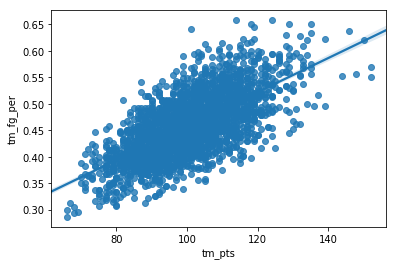

In [85]:
sns.regplot(x='tm_pts', y='tm_fg_per', data=df)

In [90]:
# Running Linear Regression on the X and y
lr = LinearRegression()

lr.fit(X,y)

lr.score(X,y)

0.9933362619468508

ElasticNetCV optimizes for out-of-sample R^2. I'll now use that to test to see what balance of ridge and LASSO optimizes this, since my in-sample R^2 is suspiciously high with these current values

Need to:

- **Separate 75% for train/cross-validation and 25% for test**
- **Normalize all the data into z-scores**

**Here I am assuming that my values for each of my ~45 variables are normally distributed, as I'm about to pass them through StandardScaler which, I believe, assumes that they my values are normally distributed if we are going to convert them to their z-scores**

In [114]:
# Splitting my dataset into train and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.25, random_state = 42)

Scaler needs to be fit and transformed after the data is split into train, validation, and test sets. The data needs to be normalized on only the training set, because in a real scenario we do not have access to the test data, and we cannot normalize based on that. X-

In [120]:
# Scaling my values with StandardScaler

scaler = sklearn.preprocessing.StandardScaler()

# Fit and transform on x_train, and transform on x_test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) # transformed on the training set scaler fit

array([[-1.0103273 , -0.22415188, -0.66750832, ...,  0.74747947,
         0.82364535, -1.30740118],
       [-1.0103273 , -0.22415188,  0.05095249, ..., -0.46599721,
        -0.71734421, -0.35392531],
       [ 0.98977827, -0.22415188, -0.48789312, ...,  0.2620888 ,
        -0.71734421, -0.48105543],
       ...,
       [-1.0103273 , -0.22415188, -1.20635393, ...,  0.01939346,
         0.60350399,  0.21816021],
       [-1.0103273 , -0.22415188, -0.66750832, ..., -0.70869255,
         0.82364535, -0.22679519],
       [-1.0103273 , -0.22415188, -1.02673873, ...,  1.96095615,
        -0.49720285, -1.11670601]])

In [124]:
len(x_train_scaled), len(x_test_scaled) # The split for train/test data - quantities look good

(1752, 585)

Now it's time to make the ElasticNetCV. I'll throw my rows into the model and see what result I get from the cross-validation ElasticNet. This will maximize my out-of-sample R^2 with the validation folds. I'll then test this model against the test set and see what my result is, to confirm that my Adjusted R^2 is good.

Finding the Adjusted R^2 of the ideal model is important because that will show the best relationship of fit that I can generate with the data points I have provided my model, after it has balanced for the ideal coefficients to maximize out-of-sample results (as currently, I only have in-sample R^2 and Adjusted R^2 to go off of)

In [148]:
# Setting up the parameters for the GridSearch to iterate over

alphas = [i/100 for i in range(1,1000)]
l1_ratios = [i/100 for i in range(1,101)]
param_grid = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

In [ ]:
# NOTE: MODEL FITTING

elastic = GridSearchCV(ElasticNet(alpha=1, l1_ratio=0.5), param_grid, cv=5, scoring='r2')

elastic.fit(x_train_scaled, y_train) # Unclear if I need to normalize y_train as well before passing it in



In [169]:
# The model is very confident according to the below results

print(elastic.best_params_)
print(elastic.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.01}
0.9924018380006886


Jonathan said I can handicap my model (give it less obvious data to train on so that I can tell a certain story), or tell the story with the current coefficients. But I should then run a prediction on my test set to see how well all my new R^2 compares. I should find the Root Mean Squared Error

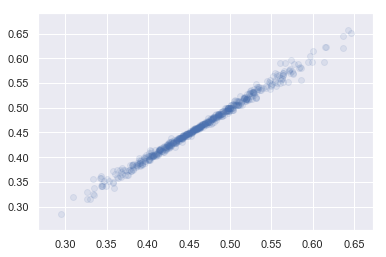

In [180]:
# Running test set predictions with my model that I will compare with y_test's actual values

test_set_pred = elastic.predict(x_test_scaled)

plt.scatter(test_set_pred, y_test, alpha = 0.1)

My model does really well compared to the test set

In [181]:
np.mean(test_set_pred), np.mean(y_test)

(0.46241217567910436, 0.4617846153846151)

In [182]:
r2_score(test_set_pred, y_test)
# My r^2 here is really really good

0.9914613768844612

In [178]:
# Defining a function to calculate the RMSE
def rmse(pred, true):
    
    error = pred - true
    sq = np.square(error)
    mean = np.mean(sq)
    root = np.sqrt(mean)

    return root

# Defining Mean Absolute Error (from regularization book)
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

In [184]:
rmse(test_set_pred, y_test), mae(test_set_pred, y_test)

(0.005530790747323272, 0.0038440711389474322)

In [188]:
print(df_nums['tm_fga'].mean())
print(df_nums['tm_fga'].mean() * mae(test_set_pred, y_test))

82.5716730851519
0.3174113854012349


In [197]:
# Rerun simple Linear Regression to compare model strengths

lr = LinearRegression()

lr.fit(x_train, y_train)

lr.score(x_test, y_test)

0.9923263582020756

My results above show that my MAE (the average error made by my model's guesses) comes out to .38% differences in fg%. RMSE comes to .55% error, though it is not correct to call this the average error for each of my model's guesses. This is some sort of root-mean-square-adjusted measure of error that penalizes outliers extra.

For a sense of perspective, my results mean that in an average game (avg = 82 fga), my model guesses .32 shots incorrectly (my model will be off by 1 fg made, on average every 3 games).

My model's data did not include things like:

- Overtime: I did not factor in a special column for overtime - my model only used the minutes played in a game as a parameter, rather than a column that counted 0, or 1, or 2 (etc) OTs. OTs may function differently than merely "more minutes" of standard gameplay. Greater tension and fatigue
- Injuries: If a star player like Paul Pierce was out, the model had no way of knowing if the team would shoot better or worse (probably my biggest data hole)
- Anything about dates. Totally excludes date measures that could correlate with the boom and bust of the team's talent, OR changing play styles. For instance, the 3 pt shot has become more popular over time, which would potentially add a time component to decreasing fg%. All my model had was the other in-game statistics to use to predict fg%

To start, my Linear Regression model had a 99.3% in-sample R^2 (I was very suspicious of this, and thought my model would fall apart in the more sophisticated models). After I fit my LinearRegression model on x_train and y_train, I scored it with x_test and y_test. My R^2 was 99.2%. This indicates that my LinearRegression was puzzlingly ever-so-slightly better than my normalized GridSearch ElasticNetCV model (at 99.1% R^2).

This very high out-of-sample performance for my linear regression may make sense because my GridSearch believed that the optimal solution was at an alpha of 0.01. By forcing it to have at least an alpha of 0.01 (its lowest possible value that I provided), it was optimizing towards a model that did not change the linear regression at all.

## *** To work on tomorrow - find a way to access the raw coefficients so I can explain what the most important factors of my model are ***


## **How could I have used plotting my residuals in this project? Should I still do that with my 99% successful model?**

## Fit my model on the test set in order to get the statistics like p-value. Jonathan says to google methods in sklearn to get p-values (I can do this with coefficients)